## 一组理想的左心室内壁压强和主动收缩力曲线


In [4]:
import numpy as np
import matplotlib.pyplot as plt

mmHg = 1  # 假设单位为标准压力单位

def calculate_pressure(t, t_load=0.2, t_end_diastole=0.5, t_cycle=0.8,
                      diastole_pressure=8.0*mmHg, systole_pressure=110.0*mmHg, start_pressure=9.0*mmHg):
    local_t = t % t_cycle
    value = 0
    
    if local_t < t_load and t < t_cycle:
        value = diastole_pressure * local_t / t_load + start_pressure * (t_load - local_t) / t_load
    elif local_t < t_load and t >= t_cycle:
        value = diastole_pressure
    elif t_load <= local_t < t_end_diastole:
        value = diastole_pressure
    elif t_end_diastole <= local_t < (0.15 + t_end_diastole):    
        a = -(local_t - t_end_diastole)**2 / 0.004
        value = diastole_pressure + (systole_pressure-diastole_pressure) * (1.0 - np.exp(a))
    elif (0.15 + t_end_diastole) <= local_t < t_end_diastole+0.3:
        a = -(local_t - t_end_diastole - 0.3)**2 / 0.004
        value = diastole_pressure + (systole_pressure-diastole_pressure) * (1.0 - np.exp(a))
    elif t_end_diastole+0.3 <= local_t < t_cycle:
        value = diastole_pressure
    
    return value

In [5]:
def calculate_tension(t, t_load = 0.2, t_end_diastole = 0.5, t_cycle = 0.8, max_tension = 600.0*mmHg):
    local_t = t % t_cycle
    if local_t < t_end_diastole:
        value = 0.0
    elif local_t >= t_end_diastole and local_t <  t_end_diastole + 0.15:
        a = -(local_t - t_end_diastole) * (local_t - t_end_diastole) / 0.005
        value = max_tension * (1.0 - np.exp(a))
    elif local_t >= t_end_diastole + 0.15 and local_t < t_end_diastole + 0.3:
        a = -(local_t - t_end_diastole - 0.3) ** 2 / 0.005
        value = max_tension * (1.0 - np.exp(a))
    elif local_t >= t_end_diastole + 0.3 and local_t < t_cycle:
        value = 0.0
    return value

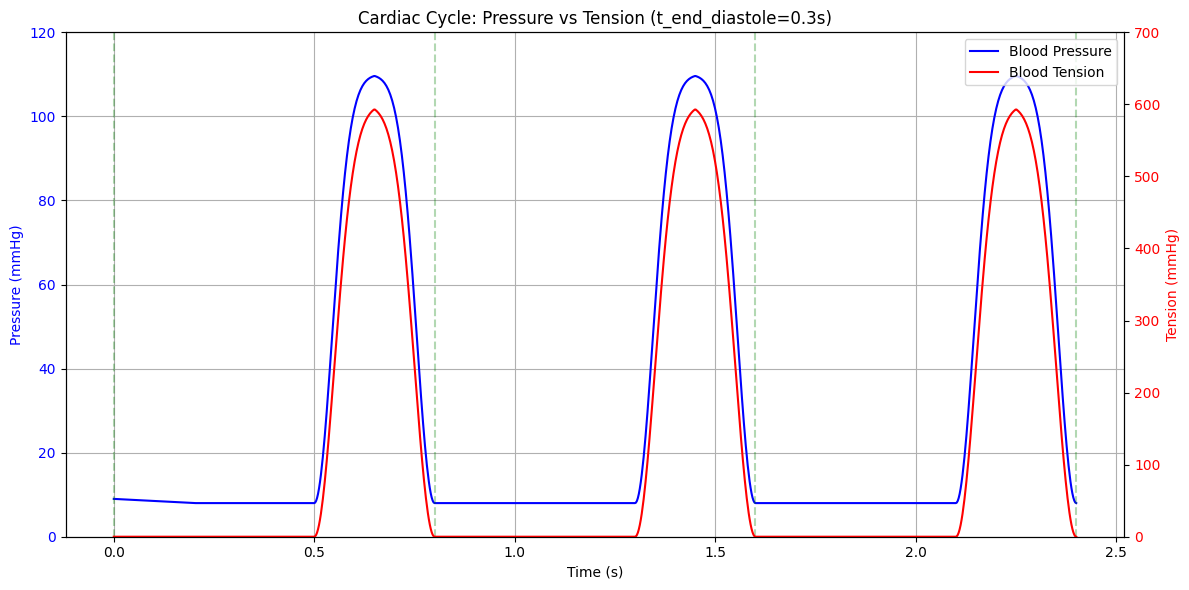

In [6]:
# 生成数据
t_values = np.linspace(0, 2.4, 1000)
pressure_values = [calculate_pressure(t) for t in t_values]
tension_values = [calculate_tension(t) for t in t_values]

# 创建画布和双坐标轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制压力曲线（左侧坐标轴）
ax1.plot(t_values, pressure_values, 'b-', label='Blood Pressure')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Pressure (mmHg)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(0, 120)
ax1.grid(True)

# 创建第二个坐标轴（右侧）
ax2 = ax1.twinx()
ax2.plot(t_values, tension_values, 'r-', label='Blood Tension')
ax2.set_ylabel('Tension (mmHg)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 700)

# 添加周期标记和标题
for i in np.arange(0, 2.5, 0.8):
    ax1.axvline(x=i, color='g', linestyle='--', alpha=0.3)
plt.title('Cardiac Cycle: Pressure vs Tension (t_end_diastole=0.3s)')

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()